In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as rn
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical




out_path = '/content/drive/My Drive/Ritorti[_Pasco]/project/numpy_data'








# **Dataset load**

In [ ]:
def load_training():
  images = np.load(os.path.join(out_path,'train_tensor.npy'))
  labels = np.load(os.path.join(out_path,'train_labels.npy'))
  return images,labels

def load_testing():
  images = np.load(os.path.join(out_path,'public_test_tensor.npy'))
  labels = np.load(os.path.join(out_path,'public_test_labels.npy'))
  return images,labels


 
images_train, labels_train= load_training()
images_test, labels_test= load_testing()












# **Preprocessing**

##Preparing training and test set for mass-calcification classification and normalization

In [ ]:
#MASS-CALCIFICATION
train_zipped = zip(images_train,labels_train)
test_zipped = zip(images_test,labels_test)
train_images_mass_calc,train_labels_mass_calc = [],[]
test_images_mass_calc,test_labels_mass_calc = [],[]

#training
for im,la in train_zipped:
  if la == 1 or la == 2: #masses -> 0
    train_images_mass_calc.append(im)
    train_labels_mass_calc.append(0)
  elif la == 3 or la == 4: #calcification -> 1
    train_images_mass_calc.append(im)
    train_labels_mass_calc.append(1)

#testing
for im,la in test_zipped:
  if la == 1 or la == 2: #masses -> 0
    test_images_mass_calc.append(im)
    test_labels_mass_calc.append(0)
  elif la == 3 or la == 4: #calcification -> 1
    test_images_mass_calc.append(im)
    test_labels_mass_calc.append(1)

train_images_mass_calc = np.array(train_images_mass_calc)
train_labels_mass_calc = np.array(train_labels_mass_calc)
test_images_mass_calc = np.array(test_images_mass_calc)
test_labels_mass_calc = np.array(test_labels_mass_calc)
print(f"Shape training: {train_images_mass_calc.shape}")
print(f"Training: {train_images_mass_calc.astype}")
print(f"Shape testing: {test_images_mass_calc.shape}")


#Normalization

train_images_mass_calc = train_images_mass_calc.reshape((2676, 150,150,1))
test_images_mass_calc = test_images_mass_calc.reshape((336, 150,150,1))

train_images_mass_calc  = train_images_mass_calc .astype('float32') / 65535
test_images_mass_calc = test_images_mass_calc.astype('float32') / 65535










Shape training: (2676, 150, 150)
Training: <built-in method astype of numpy.ndarray object at 0x7fcb7e2ed030>
Shape testing: (336, 150, 150)


In [ ]:
# Setting of parameters for reproducible results
os.environ["PYTHONHASHSEED"]="0"
np.random.seed(31)
rn.seed(14)
tf.random.set_seed(1234)

## Some of our dataset view

Distribution of classes

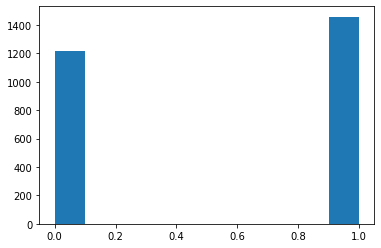

In [ ]:
plt.hist(train_labels_mass_calc)
plt.show()

float32


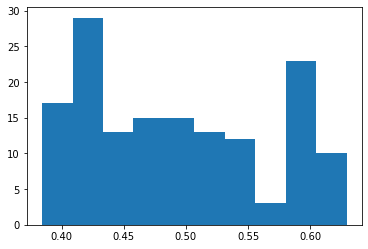

In [ ]:
print(train_images_mass_calc[0].dtype) 
plt.hist(train_images_mass_calc[0][0]) 
plt.show()

# **Scratch network**

In [ ]:
#SMALL CONVNET WITH CONV2D AND MAXPOOLING2D
from tensorflow.keras import layers
from tensorflow.keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

opt = tf.keras.optimizers.RMSprop()

model.compile(loss='binary_crossentropy',
              optimizer=opt,
             metrics=['accuracy'])

In [ ]:
history = model.fit(train_images_mass_calc, train_labels_mass_calc,validation_split=0.2, epochs=30, batch_size=64, shuffle = True)

Epoch 1/30
34/34 [==============================] - 8s 43ms/step - loss: 1.1137 - accuracy: 0.5509 - val_loss: 1.1061 - val_accuracy: 0.0000e+00
Epoch 2/30
34/34 [==============================] - 1s 28ms/step - loss: 0.6907 - accuracy: 0.5749 - val_loss: 1.1902 - val_accuracy: 0.0261
Epoch 3/30
34/34 [==============================] - 1s 29ms/step - loss: 0.7101 - accuracy: 0.5465 - val_loss: 0.7642 - val_accuracy: 0.1287
Epoch 4/30
34/34 [==============================] - 1s 28ms/step - loss: 0.6759 - accuracy: 0.5651 - val_loss: 0.6532 - val_accuracy: 0.7481
Epoch 5/30
34/34 [==============================] - 1s 28ms/step - loss: 0.6613 - accuracy: 0.6239 - val_loss: 0.3994 - val_accuracy: 0.9384
Epoch 6/30
34/34 [==============================] - 1s 28ms/step - loss: 0.6397 - accuracy: 0.6319 - val_loss: 0.7782 - val_accuracy: 0.5112
Epoch 7/30
34/34 [==============================] - 1s 31ms/step - loss: 0.5779 - accuracy: 0.7302 - val_loss: 0.7239 - val_accuracy: 0.6418
Epoch 8/3

# **Training and validation accuracy-loss diagrams**

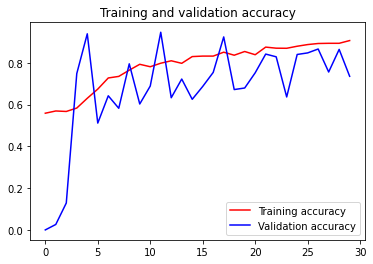

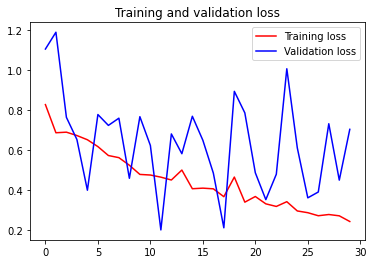

In [ ]:
#PLOT THE LOSS AND ACCURACY
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Save the model

In [ ]:
 #dir_name ="/content/drive/My Drive/Ritorti[_Pasco]/models"
 #if not os.path.exists(dir_name):
 #  os.makedirs(dir_name)
 #model.save(os.path.join(dir_name,'mass_and_calcification.h5'))

# **Scratch network with dropout**

In [ ]:



regularized_model = model
regularized_model = models.Sequential()
regularized_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
regularized_model.add(layers.MaxPooling2D((2, 2)))
regularized_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
regularized_model.add(layers.MaxPooling2D((2, 2)))

regularized_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
regularized_model.add(layers.MaxPooling2D((2, 2)))
regularized_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
regularized_model.add(layers.MaxPooling2D((2, 2)))

regularized_model.add(layers.Flatten())
regularized_model.add(layers.Dropout(0.5))
regularized_model.add(layers.Dense(512, activation='relu'))
regularized_model.add(layers.Dense(1, activation='sigmoid',kernel_regularizer='l1_l2'))
regularized_model.summary()



        
       

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from tensorflow.keras import optimizers

opt = tf.keras.optimizers.RMSprop()

regularized_model.compile(loss='binary_crossentropy',
              optimizer=opt,
             metrics=['accuracy'])

In [ ]:
history_regularized = regularized_model.fit(train_images_mass_calc, 
            train_labels_mass_calc, 
            epochs=50, 
            batch_size=64,
            validation_split = 0.2,
            shuffle = True)

Epoch 1/50
34/34 [==============================] - 2s 33ms/step - loss: 1.1151 - accuracy: 0.5546 - val_loss: 1.2514 - val_accuracy: 0.0000e+00
Epoch 2/50
34/34 [==============================] - 1s 28ms/step - loss: 0.8162 - accuracy: 0.5678 - val_loss: 1.1361 - val_accuracy: 0.0131
Epoch 3/50
34/34 [==============================] - 1s 28ms/step - loss: 0.7293 - accuracy: 0.5656 - val_loss: 0.8188 - val_accuracy: 0.0896
Epoch 4/50
34/34 [==============================] - 1s 29ms/step - loss: 0.7261 - accuracy: 0.5976 - val_loss: 0.5888 - val_accuracy: 0.9104
Epoch 5/50
34/34 [==============================] - 1s 28ms/step - loss: 0.6480 - accuracy: 0.6582 - val_loss: 0.6198 - val_accuracy: 0.7257
Epoch 6/50
34/34 [==============================] - 1s 28ms/step - loss: 0.6446 - accuracy: 0.6558 - val_loss: 1.0197 - val_accuracy: 0.1791
Epoch 7/50
34/34 [==============================] - 1s 28ms/step - loss: 0.6263 - accuracy: 0.6911 - val_loss: 0.9090 - val_accuracy: 0.3955
Epoch 8/5

# **Training and validation accuracy-loss diagrams**

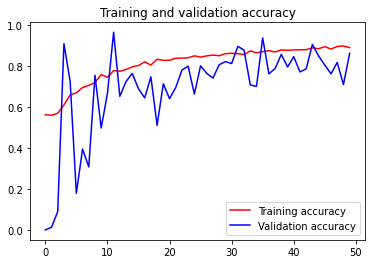

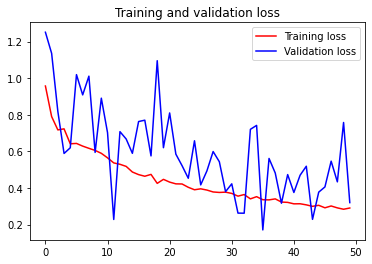

In [ ]:
#PLOT THE REGULARIZED MODEL
import matplotlib.pyplot as plt

acc = history_regularized.history['accuracy']
val_acc = history_regularized.history['val_accuracy']
loss = history_regularized.history['loss']
val_loss = history_regularized.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Evaluating the model with the test set**

In [ ]:
test_loss, test_acc = regularized_model.evaluate(test_images_mass_calc, test_labels_mass_calc)
print('test_acc:', test_acc)

11/11 [==============================] - 0s 6ms/step - loss: 0.4527 - accuracy: 0.8155
test_acc: 0.8154761791229248


Save the new model

In [ ]:
 #dir_name ="/content/drive/My Drive/Ritorti[_Pasco]/models"
 #if not os.path.exists(dir_name):
 #  os.makedirs(dir_name)
 #regularized_model.save(os.path.join(dir_name,'mass_calcification_regularized.h5'))

In [ ]:
predictions = regularized_model.predict(test_images_mass_calc) # get the output for each sample
predictions = np.round(predictions)
predictions = predictions.astype(int)
unique, counts = np.unique(test_labels_mass_calc, return_counts=True)
print('true',dict(zip(unique, counts)))
unique, counts = np.unique(predictions, return_counts=True)
print('pred',dict(zip(unique, counts)))

true {0: 179, 1: 157}
pred {0: 173, 1: 163}


**We save the predictions in a txt file to use them in the ensable method**

In [ ]:
#import csv
#dir_data_store ="/content/drive/My Drive/Ritorti[_Pasco]/data_store"
#if not os.path.exists(dir_data_store):
#  os.makedirs(dir_data_store)

#np.savetxt(os.path.join(dir_data_store,"predictions_21.csv"), predictions, delimiter=",")

**Evaluation of the model with the following tools:**


1.   Confusion matrix
2.   Accuracy, precision, recall and f1-score
3.   ROC curve

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(test_labels_mass_calc,predictions)

array([[145,  34],
       [ 28, 129]])

In [ ]:
# accuracy: (TP+TN)/(TP+FP+FN+TN): percentage of correctly predicted samples
metrics.accuracy_score(test_labels_mass_calc,predictions)

0.8154761904761905

In [ ]:
# precision: TP/(TP+FP): The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
metrics.precision_score(test_labels_mass_calc,predictions)

0.7914110429447853

In [ ]:
# recall: TP/(TP+FN): The recall is intuitively the ability of the classifier to find all the positive samples.
metrics.recall_score(test_labels_mass_calc,predictions)

0.821656050955414

In [ ]:
# f1-score: 2*(precision*recall)/(precision + recall). The F1-score is the harmonic mean of precision and sensitivity
metrics.f1_score(test_labels_mass_calc,predictions)

0.8062500000000001

In [ ]:
# classification report: Build a text report showing the main classification metrics
print(metrics.classification_report(test_labels_mass_calc,predictions))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       179
           1       0.79      0.82      0.81       157

    accuracy                           0.82       336
   macro avg       0.81      0.82      0.82       336
weighted avg       0.82      0.82      0.82       336



In [ ]:
fpr,tpr,th = metrics.roc_curve(test_labels_mass_calc,predictions)
roc_auc = metrics.roc_auc_score(test_labels_mass_calc,predictions)

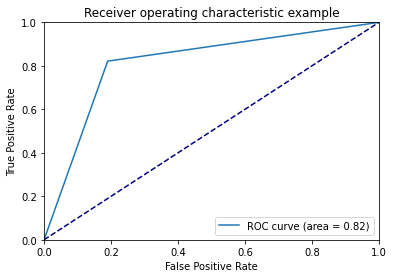

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#plt.savefig(os.path.join(dir_img,"ROC_curve.png"))
plt.show()